# Display results of analysis

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

df = pd.read_csv('../results/summary.csv')
df = df.set_index('name')
df

,total_words,distinct_words,alpha,C
name,,,,
frankenstein,78024,7541,1.114925,6.168187
jane_eyre,185390,17498,0.970275,11.911447
dracula,160664,10616,1.086088,6.969854


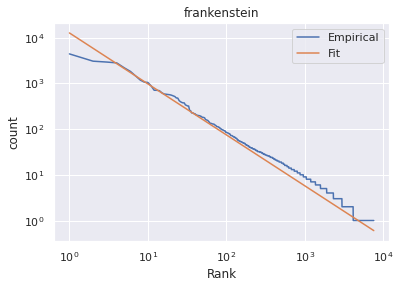

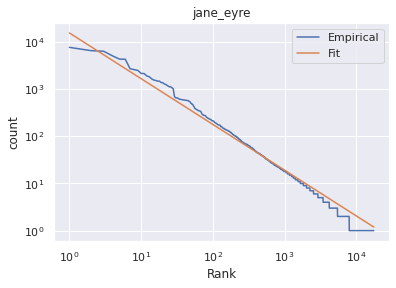

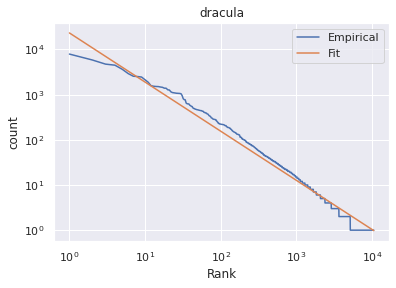

In [38]:
most_common = {}
for book, row in df.iterrows():
    plt.figure()
    df_c = pd.read_csv(f'../results/raw_counts/{book}.csv')
    rank = np.arange(df_c.shape[0]) + 1
    plt.loglog(rank, df_c.freq)
    plt.loglog(rank, df_c.freq.sum() / row.C * rank ** (-row.alpha) )
    plt.xlabel('Rank')
    plt.ylabel('count')
    plt.title(book)
    plt.legend(['Empirical', 'Fit'])
    plt.show()
    most_common[book] = df_c.word[:10].values

In [39]:
# Show most common words for each text
pd.DataFrame(most_common)

,frankenstein,jane_eyre,dracula
0,the,the,the
1,and,i,and
2,i,and,i
3,of,to,to
4,to,of,of
5,my,a,a
6,a,in,he
7,in,you,in
8,was,was,that
9,that,my,it
